## Visualizing a Simple Dataset

### The Iris Dataset

The Iris dataset ships with scikit-learn. We start by loading the dataset: 

In [228]:
import sklearn.datasets
dataset = sklearn.datasets.load_iris()

The resulting `dataset` object is a dictionary which contains: 
* the data: sepal length, sepal width, petal length, petal width, all in cm, for each iris example
* the ground truth (or target, or label) for each iris example
* the variable names
* the target names 

Here is a printout of this dictionary. Take a bit of time to look at it: 

In [27]:
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Let's extract the important information as local variables: 

In [229]:
import numpy as np
data = dataset['data']
labels = dataset['target']
var_names = dataset['feature_names']
target_names = dataset['target_names']
print(var_names)
print(np.unique(labels))
print(target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 1 2]
['setosa' 'versicolor' 'virginica']


So an example with label 0, 1, or 2 corresponds to setosa, versicolor, or virginica, respectively. 

When the dataset only has a few number of variables, which is the case here (we have only 4), it is very instructive to plot the distribution of each variable, and the correlation between any pair of variables. 

### Plotting variable distributions with matplotlib

We want to make four plots, one per variable. 

And in each plot, we will overlay the histograms corresponding to the three categories of examples.

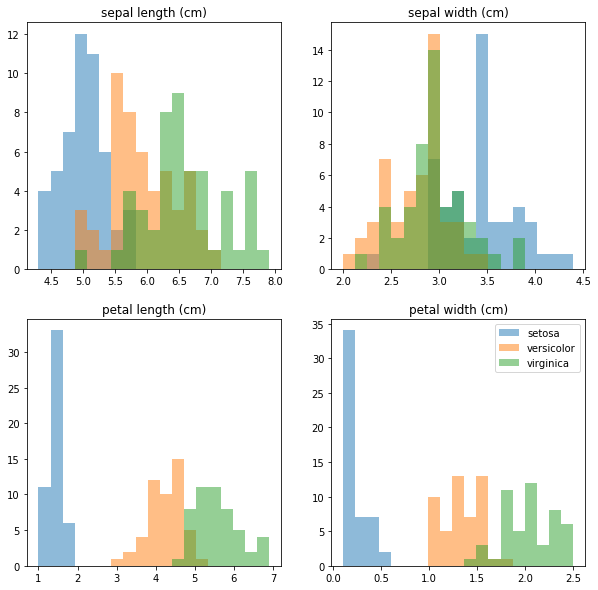

In [117]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

# loop on variables
for i in range(4):
    # create subplot 
    plt.subplot(2,2,i+1)
    # select the variable of interest from the data
    values = data[:,i]
    # define histogram binning. 
    # we use 20 bins between the minimum and maximum values
    bins = np.linspace( np.min(values), np.max(values), 20)
    # loop on categories
    for j in np.unique(labels):
        # select values for this category
        categ_values = values[labels==j]
        # plot histogram
        plt.hist(categ_values, bins, alpha=0.5, label=target_names[j])
    plt.title(var_names[i])
plt.legend()


We start to see interesting features:

* the petal length and petal width variables are very discriminating, but it's less clear for the sepal length and sepal width. 
* it's going to be easy to separate setosa, while versicolor and virginica look similar. 

For more insight, we plot the correlations between pairs of variables: 

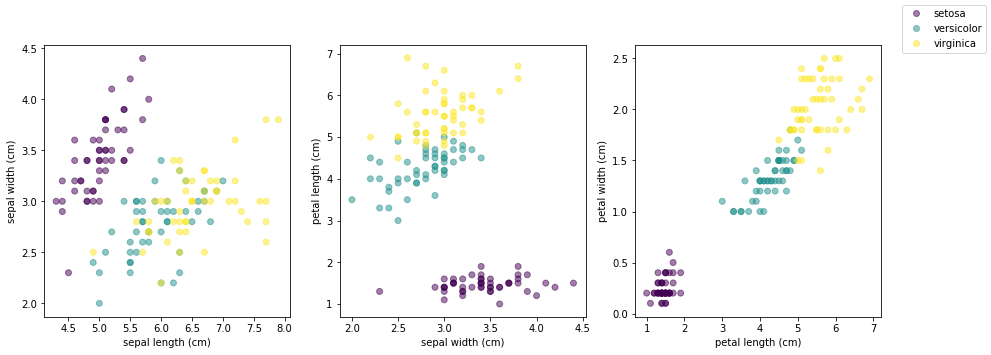

In [126]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    j = i+1
    # we plot variable 1 vs 0, then 2 vs 1, then 3 vs 2
    scatter = axs[i].scatter(data[:,i], data[:, j], c=labels, alpha=0.5)
    axs[i].set_xlabel(var_names[i])
    axs[i].set_ylabel(var_names[j])
elems = list(scatter.legend_elements())
# by default, the legend labels are the values 
# of the target, 0, 1, 2. 
# we replace that with the target names:
elems[1] = target_names
fig.legend(*elems)

Before discussing these plots, let's see how they could be done more easily, and made prettier. 

### Plotting variable distributions with Seaborn

With matplotlib, it's possible to do almost any plot, and we did get our plots. 

But as you have seen, it's not that easy, and it often requires a dozen lines of code or more. 

Fortunately, higher-level libraries like [Seaborn](https://seaborn.pydata.org/) exist. In this section, you will see how to use seaborn to plot [pairwise relationships in the dataset](https://seaborn.pydata.org/tutorial/distributions.html#visualizing-pairwise-relationships-in-a-dataset). 

Seaborn is closely interfaced to [pandas](https://pandas.pydata.org/), which is the probably the best data-analysis and data-crunching library in python. This tutorial is not about pandas, so I'm not going to give you any details. For now, you just need to know that pandas dataframes turn your data arrays into some kind of Microsoft Excel tables. 

But contrary to Excel, pandas can handle millions of rows, it's way faster, and it's fully integrated with python by construction. 

So first, we create a dataframe from our data array, giving a name to each column in the array: 

In [139]:
import pandas as pd
df = pd.DataFrame(data, 
                  columns=['sepal_length',
                           'sepal_width',
                           'petal_length',
                           'petal_width'])

And we add the corresponding labels as an additional column before printing the dataframe: 

In [131]:
df['species'] = labels 
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now that we have the dataframe, we can create a pair plot with Seaborn in just one command! 

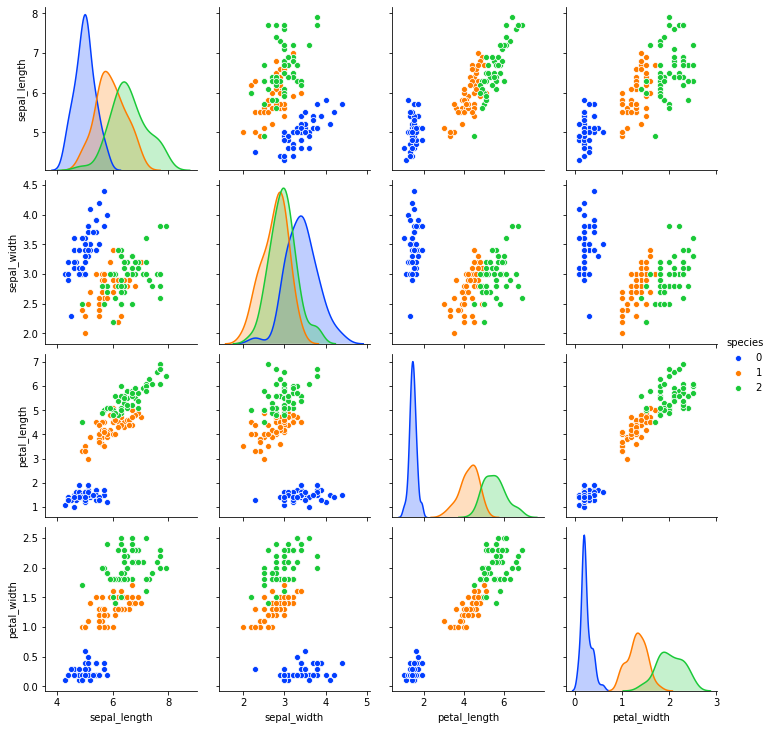

In [137]:
import seaborn as sns
sns.pairplot(df, hue="species", palette='bright');

If you don't see the full plot above, you can deactivate the scrollbar by doing Cell -> Current Outputs -> Toggle Scrolling.

Now we have a much clearer view on our dataset: 

* Both petal_length and petal_width, even taken alone, are enough to perfectly isolate setosa (0). Indeed, it's enough to apply a simple threshold in the petal_length or petal_width histograms.
* They also provide rather good discrimination for versicolor vs virginica, though the distributions overlap in the histograms. 
* In the scatter plot petal_length vs petal_width, we see that a linear combination of these variables provides the best separation between these close categories: you can just draw a straight line in the plot to discriminate them.
* sepal_length and sepal_width do not bring much
* sepal_width shows an outlier in the setosa class. Before training a machine learning model to classify irises based on all four variables, one should consider removing this outlier. 

I encourage you to have a look at the [seaborn tutorial](https://seaborn.pydata.org/tutorial.html) and the [seaborn API](https://seaborn.pydata.org/api.html) to see what exists before trying to implement a complex plot with matplotlib. 

## Principle Component Analysis (PCA)

We have seen that in the simple Iris dataset, the three classes can already be well separated by looking at only two variables, e.g. petal_length vs petal_width. 

The variables petal_length and petal_width, taken together, seem to maximize the separation between the classes, and they could be called principal components. So in some sense, we already performed a simple principal component analysis visually.

But we were able to do that only because the Iris dataset is really simple. 

in fact, in most datasets, the principal components do not correspond to the raw variables, but to combinations of the raw variables. 

Also, for datasets with a higher dimensionality (with more variables), it's not possible to find the proper combination of variables leading to the principal components by eye. 

And this is why we need PCA. 

PCA starts with a dataset in an original ND space, meaning that it has N variables. Given the desired number of principal components n<N, PCA finds the n linear combinations of the N variables that maximize the total variance of the dataset in the destination nD space. 

### PCA on the Iris dataset

Let's see PCA in action on the Iris dataset. 

First, we project the dataset from the original 4D space to 2D. 

With scikit-learn, it's very easy to run PCA: 

In [230]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
view = pca.fit_transform(data)

We can then check that our 2D view of the dataset indeed has two dimensions: 

In [231]:
view.shape

(150, 2)

And we can plot the dataset in the resulting 2D space, as a function of the two principal components

Text(0, 0.5, 'PCA-2')

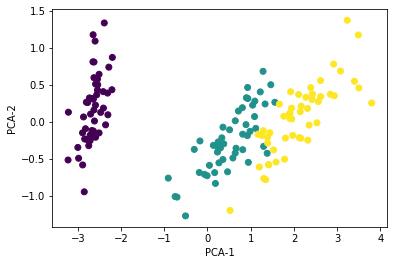

In [232]:
plt.scatter(view[:,0], view[:,1], c=labels)
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')

PCA works, but it appears that PCA-1 and PCA-2 provide worse separation between the classes than petal_length and petal_width.  

This is due to the fact that PCA maximizes the total variance of the full dataset, which is not the same as maximizing the separation between the classes!

Obviously, it would be better to maximize class separation, and this is precisely what Linear Discriminant Analysis (LDA) is doing. In case you've heard about [Fisher's linear discriminant analysis](https://en.wikipedia.org/wiki/Linear_discriminant_analysis#Fisher's_linear_discriminant), it's a kind of LDA.

But to perform LDA, you need to know the class labels, so LDA is a supervised learning technique. 

So the advantage of PCA is that it can be used to lower dataset dimensionality even when the classes are not known; it is an unsupervised learning algorithm. 


### Illustration of PCA on a simple 3D dataset

To illustrate PCA visually, let's build a toy dataset with 3 variables and 3 classes. 
Each of the three samples follows a 3D normal distribution. The distributions are centred at the vertices of an equilateral triangle:

In [237]:
import sklearn.datasets
import math
a = 3
c = math.sqrt(2*a**2)
h = math.sqrt(3)/2. * c
data, labels = sklearn.datasets.make_blobs(n_samples=2000, 
                                           n_features=3, 
                                           centers=[[0,0,0], 
                                                    [a,a,0], 
                                                    [a/2, a/2, h]])

Text(0, 0.5, 'y')

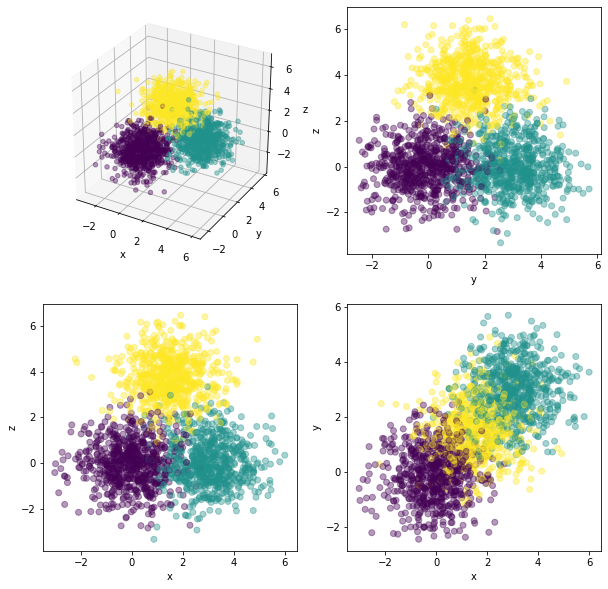

In [238]:
import mpl_toolkits.mplot3d.axes3d
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221, projection='3d')
alpha=0.4
ax.scatter(data[:,0], data[:,1], data[:,2], c=labels, alpha=alpha)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax = fig.add_subplot(222)
ax.scatter(data[:,1], data[:,2], c=labels, alpha=alpha)
ax.set_xlabel('y')
ax.set_ylabel('z')
ax = fig.add_subplot(223)
ax.scatter(data[:,0], data[:,2], c=labels, alpha=alpha)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax = fig.add_subplot(224)
ax.scatter(data[:,0], data[:,1], c=labels, alpha=alpha)
ax.set_xlabel('x')
ax.set_ylabel('y')


Take a moment to understand how this dataset is arranged in 3D.

In all three 2D views built from the raw x,y,z variables, the blobs overlap, and it's not possible to separate the classes. 

PCA, on the other hand, flies around the dataset in 3D until it finds the best point of view: 

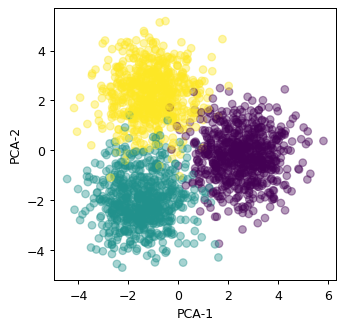

In [251]:
view = pca.fit_transform(data)
fig = plt.figure(dpi=90)
ax = fig.add_subplot(111)
ax.scatter(view[:,0], view[:,1], c=labels, alpha=alpha)
ax.set_xlabel('PCA-1')
ax.set_ylabel('PCA-2')
ax.set_aspect('equal')

In this view, the separation is much better. 

Again, take some time to find out from where PCA looks at the equilateral triangle in 3D. 

---

**Important facts about PCA**:

* PCA is an unsupervised learning algorithm. It does not maximize class separation but total variance in the dataset;
* It is linear, so it preserves the distances between points of the dataset.

---

## Visualizing the MNIST Handwritten Digits Dataset

The MNIST dataset comprises images of handritten digits between 0 and 9. Each image has 28x28 = 784 pixels, with a single grayscale channel for each pixel. 

Let's download the full dataset from openml: 

In [252]:
from sklearn.datasets import fetch_openml
raw_data, raw_labels = fetch_openml('mnist_784', version=1, return_X_y=True)

Here is some basic information about the dataset:

In [256]:
print(raw_data.shape)
print(np.max(raw_data))
print(np.unique(raw_labels))

(70000, 784)
255.0
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


We have 70 000 images. For each image, the grayscale values for each pixel are between 0 and 255, and are presented in a flat 1D array. The labels are provided as strings. 

For what we want to do, 70 000 is way too much, so we're going to start by selecting a subset of the dataset: 

In [257]:
nsamples = 5000
data = raw_data[:nsamples]
labels = raw_labels[:nsamples]

Then, we do a bit of preprocessing:

* normalize grayscale levels to 1. 
* convert labels from strings to integers
* create an array of images for plotting, in which the 28x28 pixel structure is restored

In [258]:
data = data / 255.
labels = labels.astype('int')
images = data.reshape(data.shape[0], 28, 28)

Here are a few digit images: 

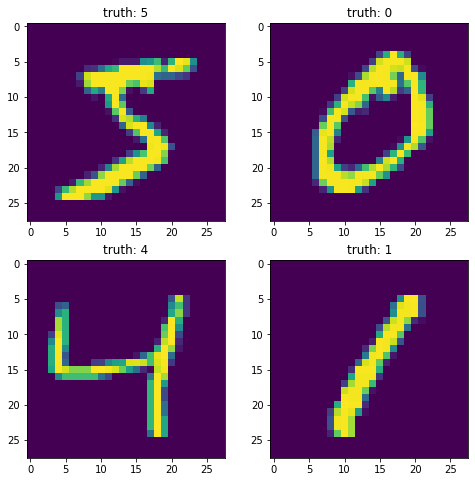

In [267]:
plt.figure(figsize=(8,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i])
    plt.title('truth: {}'.format(labels[i]))

Each image has a given grayscale value in each of the 784 pixels. So each image is a point in a 784D space. 

Do we have a way to reduce the dimensionality of this dataset to a manageable level, so that we can see whether the points have a tendency to cluster together depending on their class? Our brains can only visualize spaces with 3 dimensions or less, so we will need to project our points to their original 784D space to either a 2D or a 3D space. 

### PCA on the MNIST dataset

We start with a principal component analysis: 

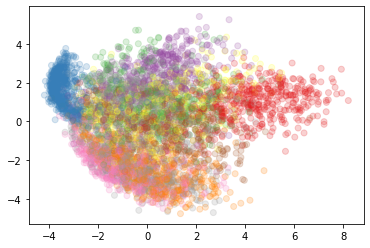

In [270]:
pca = decomposition.PCA(n_components=2)
view = pca.fit_transform(data)
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.2, cmap='Set1')

Some structure appears, and we are able to identify a few rather isolated clusters!  

That's quite impressive, given the drastic dimensionality reduction we have applied (from 784 to 2 dimensions).

Still, most of the distribution remains confused, with some classes spread all over the place. 